In [2]:
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from cellpose import utils, io, models, plot
from PIL import Image


In the cell below, I am trying to open the segmented images from Holomonitor in hopes that I can use it for tranasfer learning using CellPose... It seems to not be working because Holomonitor's software outputs segmented images in a weird format with borders, which I do not appreciate. 

The image is an RGBA image.


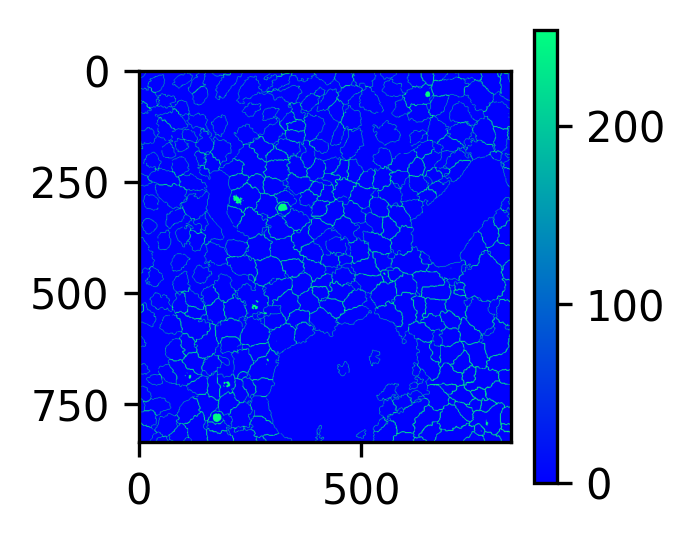

In [81]:
#sanity check to see if your images are in the wrong format (RGBA)
#RGBA = image has a red, green, blue, and alpha channel

from PIL import Image
import cv2
fig, ax = plt.subplots(1, 1, figsize=(10, 10))



# Load the TIFF image
# image = Image.open('C:/Users/Nigar/Documents/UiOM2/MachineLearning/cellpose_AML/test/Well1Pos4-PlainImages_test/Well 1-4 1.tiff')
image = Image.open('C:/Users/Nigar/Documents/UiOM2/MachineLearning/cellpose_AML/train/Well1Position4-every10mins-segment/Well1Position4_1.tif')


# Check if the image mode is RGBA
if image.mode == 'RGBA':
    print('The image is an RGBA image.')
else:
    print('The image is not an RGBA image.')
    
plt.imshow(image)

#want to crop out the white background 
white = np.array([255, 255, 255, 255])
new_image = np.where(image == white, 0, image)

plt.imshow(new_image)

color_mask = np.array(image)[:,:,0] > 0
# plt.imshow(color_mask)


# Load the image
img = cv2.imread('C:/Users/Nigar/Documents/UiOM2/MachineLearning/cellpose_AML/train/Well1Position4-every10mins-segment/Well1Position4_1.tif')

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the edges of the image
edges = cv2.Canny(img_gray, 100, 200)

# Get the bounding box of the edges
coords = cv2.findNonZero(edges)
x, y, w, h = cv2.boundingRect(coords)

# Crop the image using the bounding box
cropped_img = Image.fromarray(img_gray[y:y+h, x:x+w])

plt.imshow(cropped_img, cmap = 'winter')
plt.colorbar()

#make a mask of the image 
#pick out components wit intensity > 200
image_mask = np.array(cropped_img) > 125

plt.imshow(image_mask, cmap = 'winter')



Now, time to follow CellPose's notebook to try and segment our cells! 

"\nimg = io.imread(files[-1])\nimg1 = io.imread(files[0])\nplt.figure(figsize=(2,2))\nplt.imshow(img, cmap='gray')\nplt.axis('off')\nplt.show()\n"

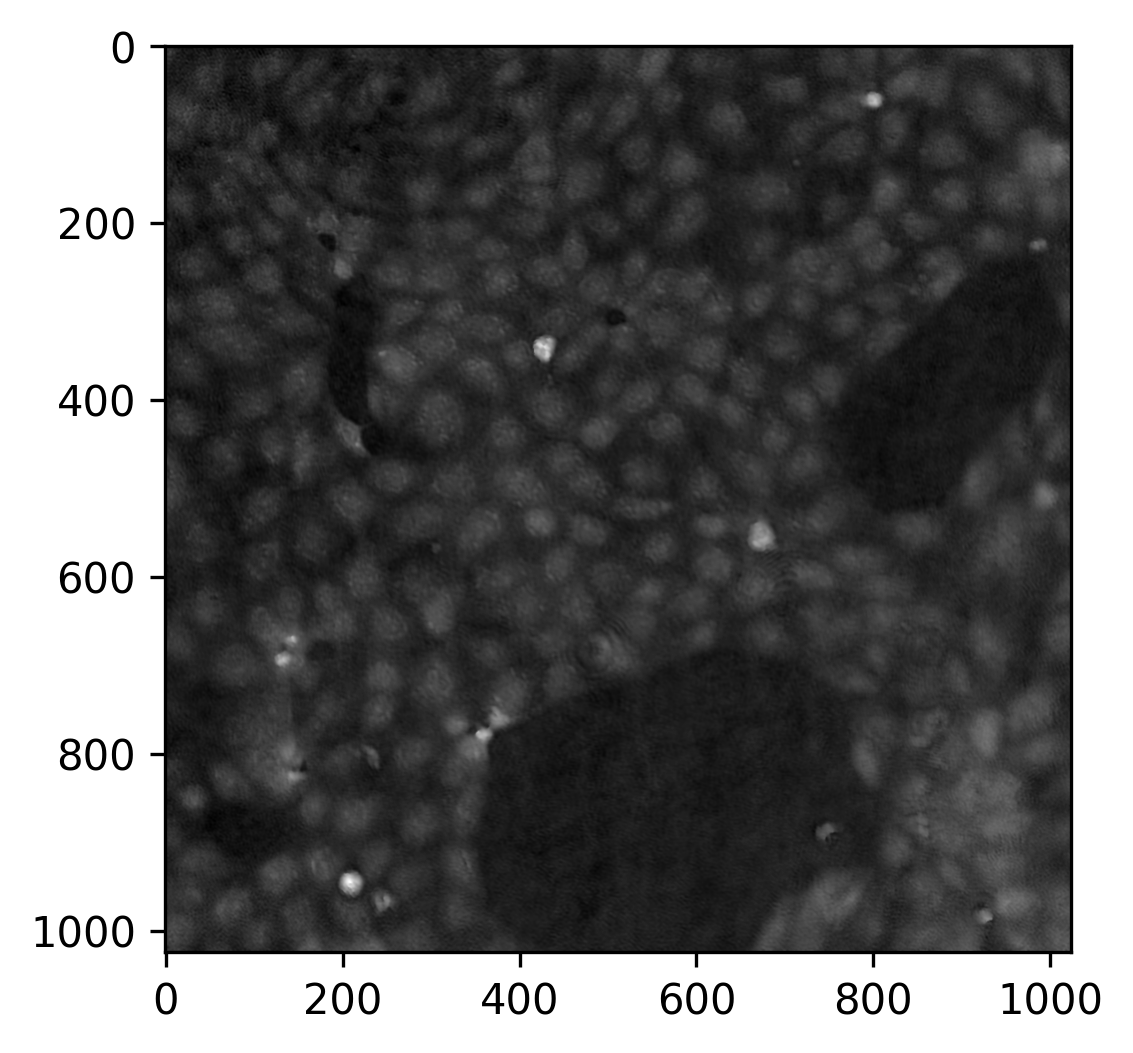

In [64]:
# files = ['Well 1-4 1.tiff', 'Well 1-4 2.tiff']
#load in all of the images in the folder 
# files = [f for f in os.listdir('C:/Users/Nigar/Documents/UiOM2/MachineLearning/cellpose_AML/test/Well1Pos4-PlainImages_test/') if f.endswith('.tiff')]

# # print(files[0])
# # view 1 image
# img = io.imread(files[0])

import os
import urllib.parse
import glob

image_dir = 'C:/Users/Nigar/Documents/UiOM2/MachineLearning/cellpose_AML/test/Well1Pos4-PlainImages_test/'
files = glob.glob(f"{image_dir}/*.tiff")

img = io.imread(files[-1])
plt.imshow(img, cmap='gray')

"""
img = io.imread(files[-1])
img1 = io.imread(files[0])
plt.figure(figsize=(2,2))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()
"""

In [4]:
# RUN CELLPOSE

# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(gpu=False, model_type='cyto')

masks, flows, styles, diams = model.eval(img, diameter=50, channels=[0,0])



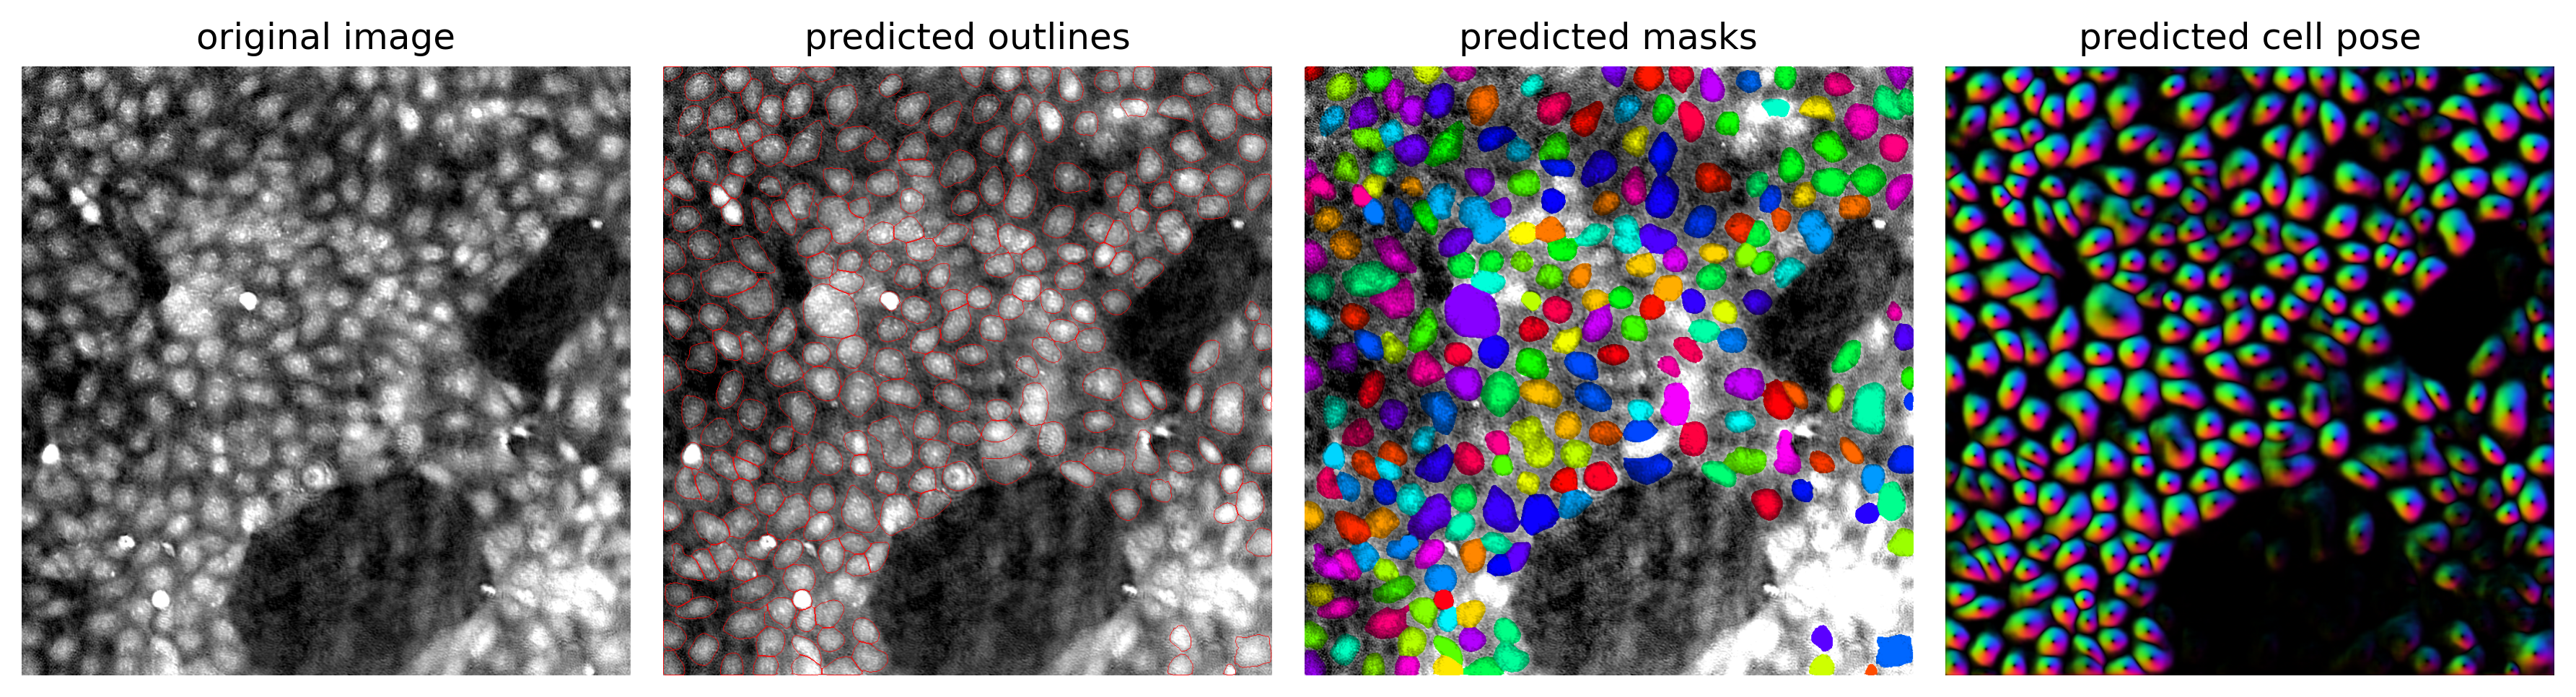

<Figure size 1800x1200 with 0 Axes>

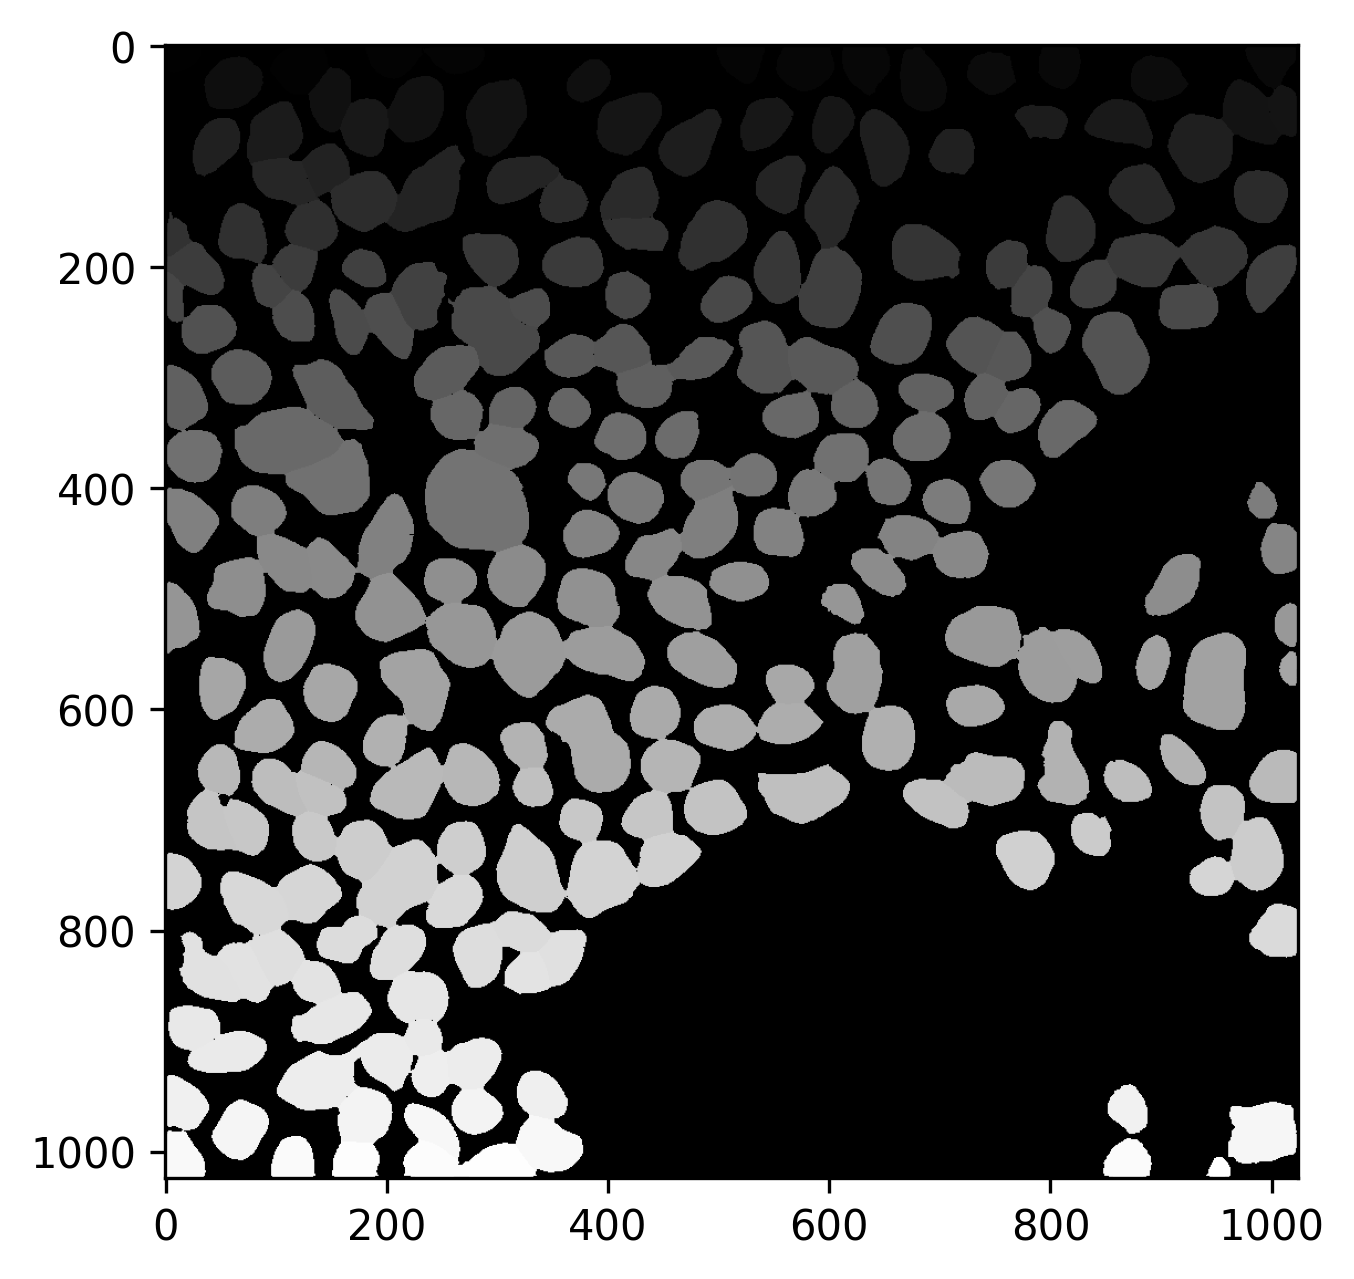

In [6]:
fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, img, masks, flows[0], channels=[0,0])
plt.tight_layout()
plt.show() 
plt.savefig('cellpose_segmentation_W1P4.png')

fig = plt.figure(figsize=(12,5))
plt.imshow(masks, cmap='gray')

